In [ ]:
!pip install gensim


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Ryanc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [2]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471932530403137), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [3]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

import gensim.downloader as api

# Load the pre-trained Word2Vec model (GloVe)
model = api.load("glove-wiki-gigaword-100")

# Getting the vector for a word
lion = model['lion']


print(model.most_similar('lion'))



print(model.similarity('lion', 'tiger'))


[('dragon', 0.6983296275138855), ('elephant', 0.6701437830924988), ('leopard', 0.6132001876831055), ('bear', 0.6131966710090637), ('cat', 0.5955514907836914), ('bull', 0.5882091522216797), ('wolf', 0.5875985026359558), ('golden', 0.5790417790412903), ('tiger', 0.5733930468559265), ('beast', 0.5692464113235474)]
0.5733929


These results for the most part do make sense. The animals for the most part, are all large wild animals. I would expect the word "cat" and "tiger" to have a higher similarty score.

In [4]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.666556179523468), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.44406628608703613), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964928627014), ('pigs', 0.6755765080451965), ('animal', 0.6683687567710876)]


In [5]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736346244812), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772217750549316),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [6]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

import gensim.downloader as api

# Load the pre-trained Word2Vec model (GloVe)
model = api.load("glove-wiki-gigaword-100")

# Define the gender vector
gender_vector = model["woman"] - model["man"]

# List of words to analyze
words_to_analyze = ["doctor", "nurse", "engineer", "teacher", "scientist"]

# Add the gender vector to each word and find the most similar words
for word in words_to_analyze:
    modified_vector = model[word] + gender_vector
    similar_words = model.most_similar(modified_vector)
    print(f"Most similar words to '{word}' with gender vector added:")
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity}")
    print("\n")

Most similar words to 'doctor' with gender vector added:
doctor: 0.8661208748817444
nurse: 0.7757077813148499
physician: 0.7128061652183533
woman: 0.7089030742645264
doctors: 0.6793617010116577
pregnant: 0.6787967681884766
patient: 0.6772217750549316
dentist: 0.6694242358207703
mother: 0.6586816310882568
medical: 0.6466937065124512


Most similar words to 'nurse' with gender vector added:
nurse: 0.8992332816123962
nurses: 0.6888664364814758
pregnant: 0.688625693321228
nursing: 0.6761317849159241
midwife: 0.6643049716949463
dentist: 0.6424211859703064
woman: 0.6382318139076233
therapist: 0.636253297328949
pediatrician: 0.622150719165802
doctor: 0.6122641563415527


Most similar words to 'engineer' with gender vector added:
engineer: 0.8386673927307129
technician: 0.6592558026313782
educator: 0.6148399710655212
surgeon: 0.595658004283905
contractor: 0.5834692716598511
engineers: 0.5829452872276306
nurse: 0.5769463777542114
engineering: 0.5586187243461609
worker: 0.5585639476776123
physic

This shows that words like "doctor" do not have a clear gender bias, but the word "nurse" does seem to have a feminine bias. We see words like "woman," "pregnant," and "midwife."

Part 2: Visualization and Embeddings in Space

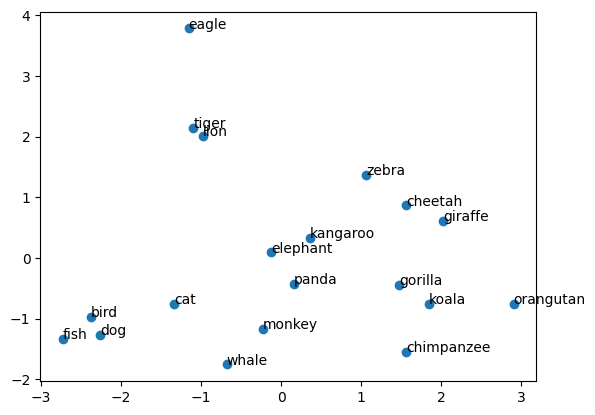

In [7]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

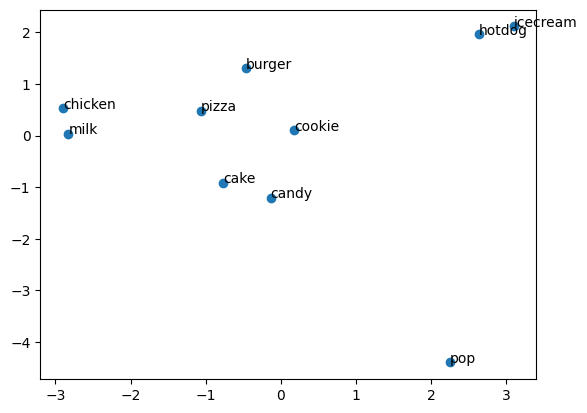

In [8]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = ["hotdog", "burger", "pizza", "cake", "candy", "milk", "cookie", "icecream", "pop", "chicken"]

X = [model[word] for word in words]

# Identify clusters of words in the word embeddings at high dimensions
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))

plt.show()



Yes, this makes sense. Desert type foods are closer together and fast foods like pizza and burger are closer together.

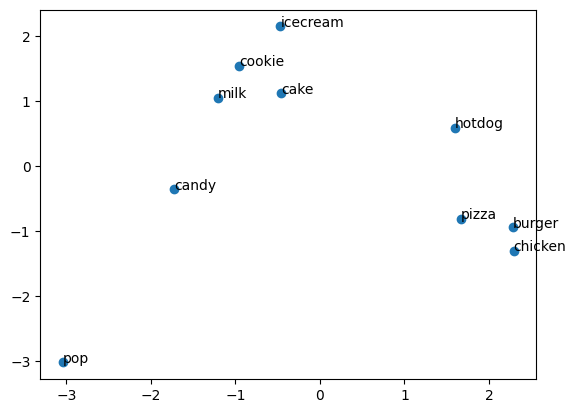

In [9]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
# The similarity between words and overall distances in the embedding space may change based on the training data used for the model.
twitter_model= gensim.downloader.load("glove-twitter-100")
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import gensim.downloader as api

# Load the Twitter-based GloVe model
twitter_model = api.load("glove-twitter-100")

words = ["hotdog", "burger", "pizza", "cake", "candy", "milk", "cookie", "icecream", "pop", "chicken"]

X = [twitter_model[word] for word in words]

# Perform PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))

plt.show()


The graph appears to have the smae word in close proximty together but it moving along the graph in opposite direction.

Part 3: Embedding reddit posts

In [10]:
#read in uiuc csv
import pandas as pd
uiuc= pd.read_csv("uiuc.csv")
mich= pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [11]:
#using the code from project 1, import pandas as pd
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


data = data.dropna(subset=['text'])  


vectorizer = CountVectorizer(stop_words='english', max_features=5000)  

X_bow = vectorizer.fit_transform(data['text'])  
y = data['label']  

bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())


print(bow_df)




      00  000  02  05  06  07  08  09  10  100  ...  yup  zelle  zero  zhang  \
0      0    0   0   0   0   0   0   0   0    0  ...    0      0     0      0   
1      0    0   0   0   0   0   0   0   0    0  ...    0      0     0      0   
2      0    0   0   0   0   0   0   0   0    0  ...    0      0     0      0   
3      0    0   0   0   0   0   0   0   0    0  ...    0      0     0      0   
4      0    0   0   0   0   0   0   0   0    0  ...    0      0     0      0   
...   ..  ...  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...    ...   ...    ...   
9445   0    0   0   0   0   0   0   0   0    0  ...    0      0     0      0   
9446   0    0   0   0   0   0   0   0   0    0  ...    0      0     0      0   
9447   0    0   0   0   0   0   0   0   0    0  ...    0      0     0      0   
9448   0    0   0   0   0   0   0   0   0    0  ...    0      0     0      0   
9449   0    0   0   0   0   0   0   0   0    0  ...    0      0     0      0   

      zionism  zionist  zionists  zip  

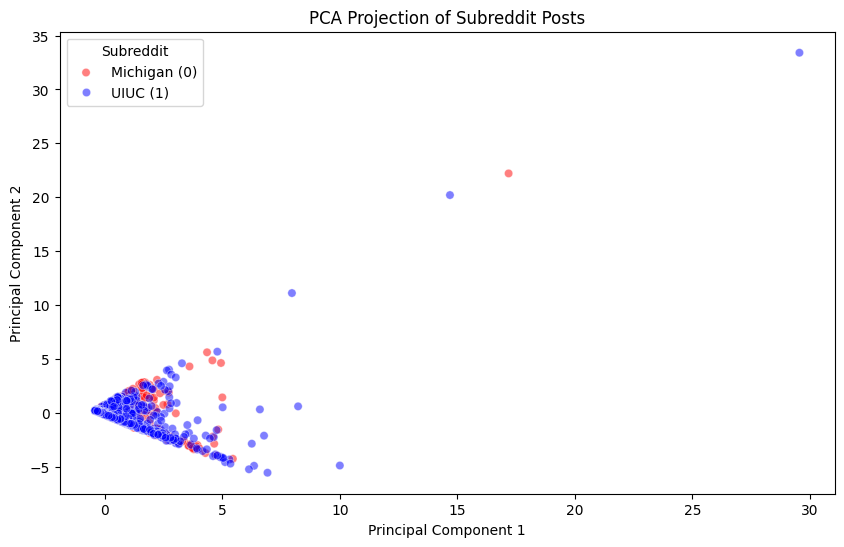

In [12]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_bow)

# Convert to DataFrame for visualization
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = y.values

# Plot the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=pca_df['label'], palette={0: 'blue', 1: 'red'}, alpha=0.5, data=pca_df)
plt.title('PCA Projection of Subreddit Posts')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Subreddit', labels=['Michigan (0)', 'UIUC (1)'])
plt.show()

There does not appear to be a clear seperation. There is one large cluster within  the graph.

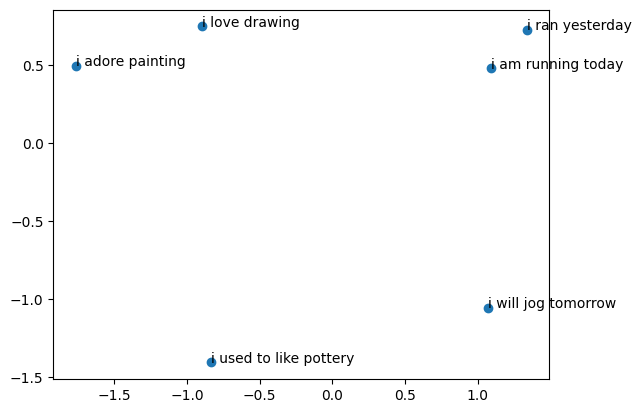

In [13]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

# Ensure the model is defined before using it
import gensim.downloader as api

# Load the pre-trained Word2Vec model (GloVe)
model = api.load("glove-wiki-gigaword-100")

avg_embeddings = [avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

C:\Users\Ryanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Ryanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


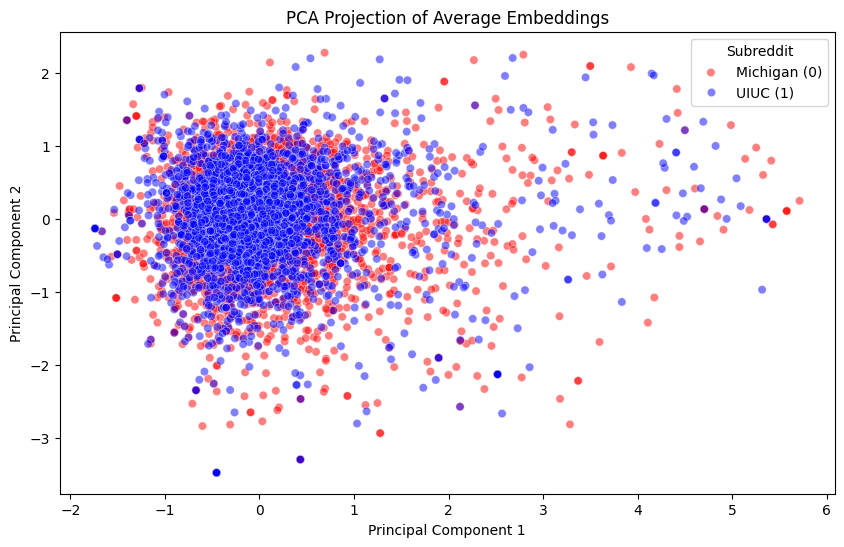

In [14]:

# Calculate the average embedding for each post in the dataset
data['avg_embedding'] = data['text'].apply(lambda x: avg_embedding(x, model))

# Remove rows with NaN values in the average embeddings
data = data.dropna(subset=['avg_embedding'])

# Convert the list of average embeddings into a numpy array
avg_embeddings = np.array(data['avg_embedding'].tolist())

# Perform PCA on the average embeddings
pca = PCA(n_components=2)
X_pca = pca.fit_transform(avg_embeddings)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = data['label'].values

# Plot the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=pca_df['label'], palette={0: 'blue', 1: 'red'}, alpha=0.5, data=pca_df)
plt.title('PCA Projection of Average Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Subreddit', labels=['Michigan (0)', 'UIUC (1)'])
plt.show()




Part 4: HuggingFace and BERT

In [15]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Ryanc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:


# Use a pipeline as a high-level helper
from transformers import pipeline

# Download BERT model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

C:\Users\Ryanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Ryanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Ryanc\.cache\huggingface\hub\models--finiteautomata--bertweet-base-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://hugg

In [17]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [23]:
from tqdm import tqdm

# Batch processing
batch_size = 10
texts = data['text'].tolist()
sentiments = []

for i in tqdm(range(0, len(texts), batch_size)):
    batch = texts[i:i + batch_size]
    try:
        batch_sentiments = pipe(batch)
        sentiments.extend([result['label'] for result in batch_sentiments])
    except Exception as e:
        sentiments.extend([None] * len(batch))  # Handle errors gracefully

data['sentiment'] = sentiments
print(data['sentiment'].value_counts())

100%|██████████| 880/880 [09:09<00:00,  1.60it/s]

sentiment
NEU    2408
NEG    1161
POS    1055
Name: count, dtype: int64


In [25]:
#look at ten sample posts and labels; do you agree with all of them? 
sample = data[['text', 'sentiment']].sample(10)
for index, row in sample.iterrows():
    print(f"Post: {row['text']}")
    print(f"Sentiment: {row['sentiment']}")
    print("\n")

Post: Nah don’t take it here. If you really want you can take it next summer at a cc, you will probably have a better time and will learn it well enough assuming you don’t treat it like a total blowoff. This is exactly what I’m doing with diffeq right now (not required for CS engineering but I wanted to learn diffeq anyways) and I’d rather take it at a CC and transfer the credit than get mauled at umich.
Sentiment: NEU


Post: what reference?
Sentiment: NEU


Post: I truly truly deeply wish for students to make the connection between what these people are doing and the tactics employed by Hamas.
Sentiment: None


Post: Yes calling for anyone’s deaths on a university campus is unacceptable.
Sentiment: None


Post: You pretty much have to go to a bank or buy something with cash at a gas station and ask for your change in quarters
Sentiment: NEU


Post: could you talk a little more about what the software engineering side of cyber looks like
Sentiment: None


Post: The deficit is caused b

I wouldnt say I 100 percent agree with all of them.

In [27]:
#is the UIUC or Michigan subreddit more negative?
uiuc_negative=data[(data['label']==1) & (data['sentiment']=='NEG')].shape[0]
mich_negative=data[(data['label']==1) & (data['sentiment']=='NEG')].shape[0]
print(f"UIUC Negative: {uiuc_negative}")
print(f"Michigan Negative: {mich_negative}")

UIUC Negative: 663
Michigan Negative: 663


They appear to be equal